In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../..')))
from pocketml import MinMaxScaler, train_test_split, LinearRegression, r2_score

In [3]:
df = pd.read_csv("datasets/paris-housing.csv")
df = df.dropna()

In [4]:
X = df.drop(columns="price").to_numpy()
y = df["price"].to_numpy()

X = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Batch GD R²: 0.8243
SGD R²: 0.9998


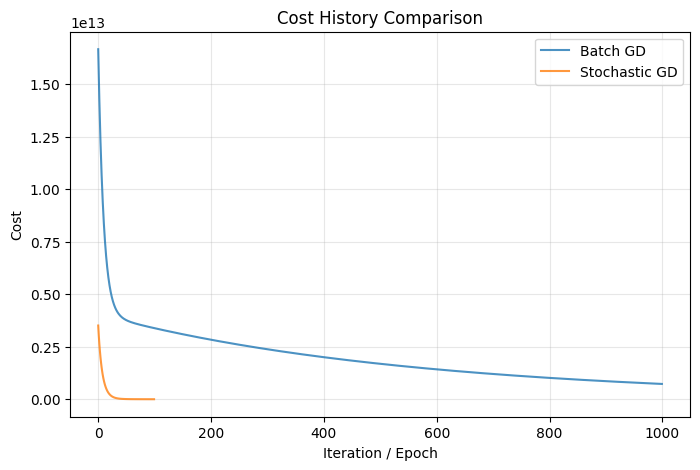

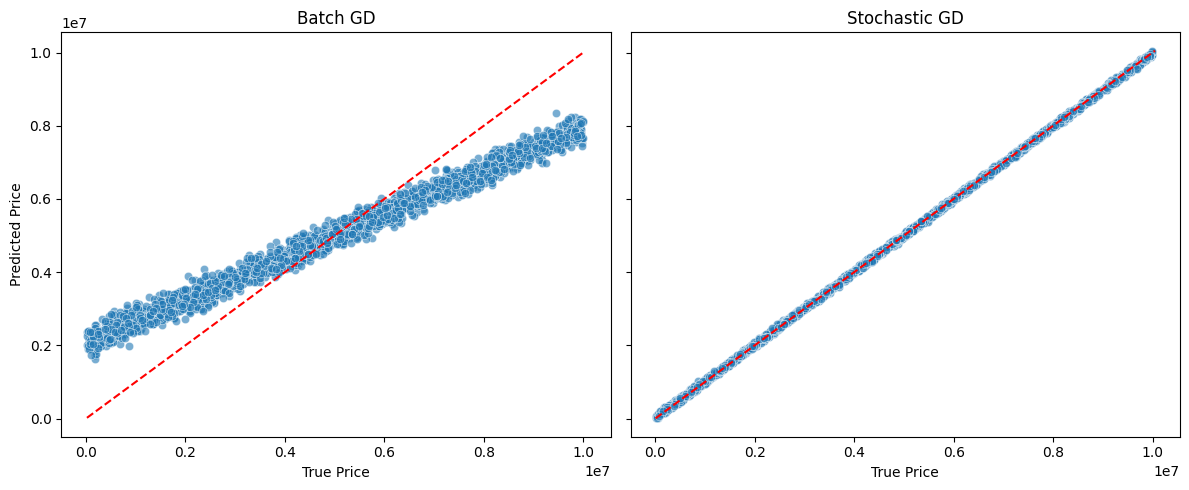

In [5]:
# train batch-GD
model_batch = LinearRegression(lr=0.01, n_iters=1000, method="batch")
model_batch.fit(X_train, y_train)
y_pred_batch = model_batch.predict(X_test)
r2_batch = r2_score(y_test, y_pred_batch)

# train stochastic-GD 
model_sgd = LinearRegression(lr=0.0001, n_iters=100, method="stochastic", shuffle=True)
model_sgd.fit(X_train, y_train)
y_pred_sgd = model_sgd.predict(X_test)
r2_sgd = r2_score(y_test, y_pred_sgd)

print(f"Batch GD R²: {r2_batch:.4f}")
print(f"SGD R²: {r2_sgd:.4f}")

#plot cost histories
plt.figure(figsize=(8,5))
plt.plot(model_batch.cost_history, label="Batch GD", alpha=0.8)
plt.plot(model_sgd.cost_history, label="Stochastic GD", alpha=0.8)
plt.xlabel("Iteration / Epoch")
plt.ylabel("Cost")
plt.title("Cost History Comparison")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#true vs predicted scatterplots
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharex=True, sharey=True)
for ax, y_pred, title in zip(axes, [y_pred_batch, y_pred_sgd], ["Batch GD", "Stochastic GD"]):
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, ax=ax)
    lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
    ax.plot(lims, lims, "r--")
    ax.set_title(title)
    ax.set_xlabel("True Price")
    ax.set_ylabel("Predicted Price")
plt.tight_layout()
plt.show()

In [6]:
import time

# test the model time 
model_batch = LinearRegression(lr=0.01, n_iters=100, method="batch")
model_sgd = LinearRegression(lr=0.01, n_iters=100, method="stochastic", shuffle=True)

start = time.time()
model_batch.fit(X_train, y_train)
batch_time = time.time() - start

start = time.time()  
model_sgd.fit(X_train, y_train)
sgd_time = time.time() - start

print(f"Batch GD took {batch_time:.4f} seconds")
print(f"Stochastic GD took {sgd_time:.4f} seconds")

Batch GD took 0.0205 seconds
Stochastic GD took 3.0531 seconds
